<a href="https://colab.research.google.com/github/TonyToeTap/FantasyFootball/blob/main/FF_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv').iloc[:, 1:]

In [39]:
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [40]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         671 non-null    object 
 1   Tm             671 non-null    object 
 2   Pos            596 non-null    object 
 3   Age            671 non-null    int64  
 4   G              671 non-null    int64  
 5   GS             671 non-null    int64  
 6   Tgt            670 non-null    float64
 7   Rec            670 non-null    float64
 8   PassingYds     670 non-null    float64
 9   PassingTD      670 non-null    float64
 10  PassingAtt     670 non-null    float64
 11  RushingYds     670 non-null    float64
 12  RushingTD      670 non-null    float64
 13  RushingAtt     670 non-null    float64
 14  ReceivingYds   670 non-null    float64
 15  ReceivingTD    670 non-null    float64
 16  FantasyPoints  581 non-null    float64
 17  Int            670 non-null    float64
 18  Fumbles   

In [41]:
pd.set_option('chained_assignment', None) # I don't care about overriding the original df

In [42]:
# Creating subsets of the original DataFrame for each position
rb_df = df[df['Pos'] == 'RB'].copy()
wr_df = df[df['Pos'] == 'WR'].copy()
te_df = df[df['Pos'] == 'TE'].copy()
qb_df = df[df['Pos'] == 'QB'].copy()



# Accoring to the settings in my league
fantasy_scoring_weights = {
    'Rec': 0.5, # Half-PPR
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'FumblesLost': -2, #fumbles lost
    'RushingYds': 0.1,
    'RushingTD': 6,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -1
    }

def get_fantasy_points(row):
    
    g = row['G'] # access the G(ames played) column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g


# The usage of a player is defined as Targets + Rushing Attempts. I want to add
# that metric in a seperate column in the DataFrame divided by the players' 
# games played.
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G']

# 
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

# I am only interested in the following columns/attributes of the players
rb_df = rb_df[['Player', 'Tm', 'G', 'RushingAtt', 'Tgt'] + list(fantasy_scoring_weights.keys()) + ['Usage/G', 'FantasyPoints/G']]

rb_df.head()

,Player,Tm,G,RushingAtt,Tgt,Rec,ReceivingYds,ReceivingTD,FumblesLost,RushingYds,RushingTD,PassingYds,PassingTD,Int,Usage/G,FantasyPoints/G
0,Jonathan Taylor*+,IND,17,332.0,51.0,40.0,360.0,2.0,2.0,1811.0,18.0,0.0,0.0,0.0,22.529412,20.770588
4,Austin Ekeler,LAC,16,206.0,94.0,70.0,647.0,8.0,3.0,911.0,12.0,0.0,0.0,0.0,18.750000,19.050000
10,Joe Mixon*,CIN,16,292.0,48.0,42.0,314.0,3.0,1.0,1205.0,13.0,0.0,0.0,0.0,21.250000,16.681250
13,Najee Harris*,PIT,17,307.0,94.0,74.0,467.0,3.0,0.0,1200.0,7.0,0.0,0.0,0.0,23.588235,15.511765
15,James Conner*,ARI,15,202.0,39.0,37.0,375.0,3.0,0.0,752.0,15.0,0.0,0.0,0.0,16.066667,15.946667


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


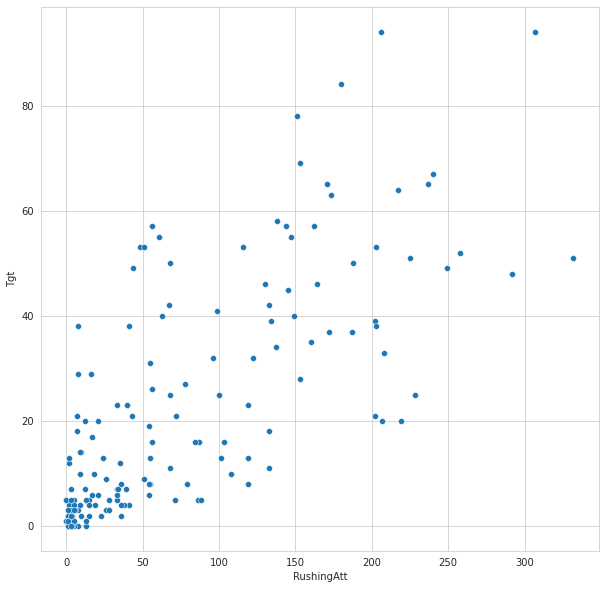

In [43]:
# seaborn settings
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt']);

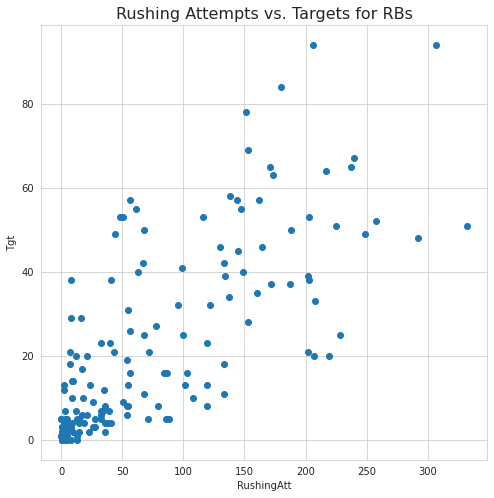

In [44]:
# Same plot but with the matplotlib library

plt.figure(figsize=(8,8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs. Targets for RBs', fontsize=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


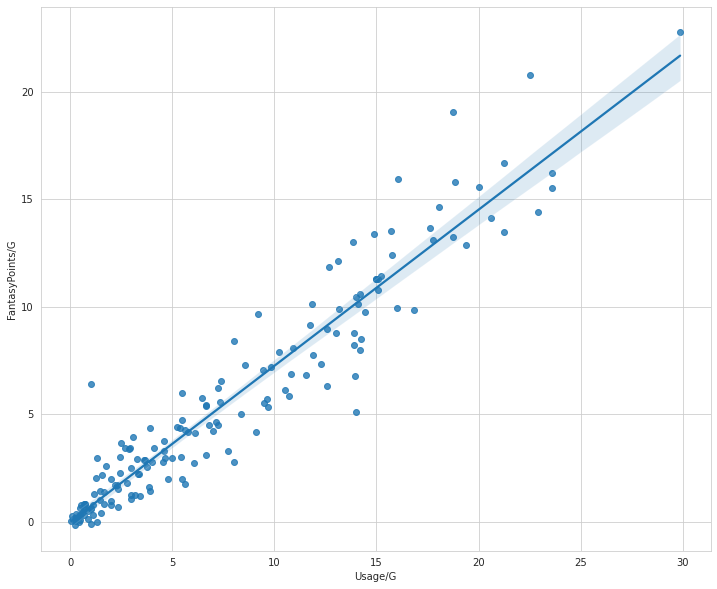

In [45]:
# I want to see if there is a linear trend between the Usage of a RB and the 
# scored FantasyPoints on a per game basis.

plt.figure(figsize=(12, 10))
sns.regplot(rb_df['Usage/G'], rb_df['FantasyPoints/G']);

It can be seen, that the player's usage is correlated with their fantasy football output. This underlines the statement that you should start the RB's which get consistent touches/which are consistently used.

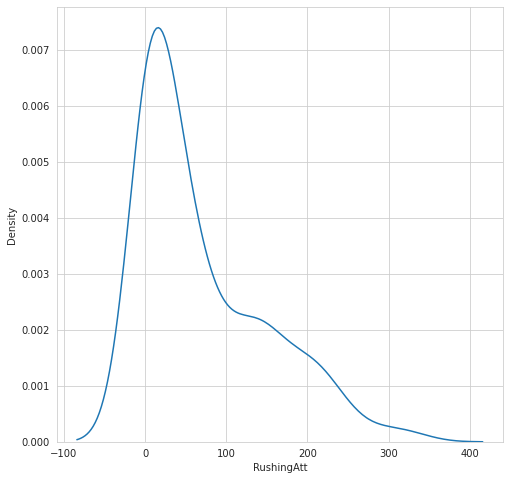

In [46]:
plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['RushingAtt']);

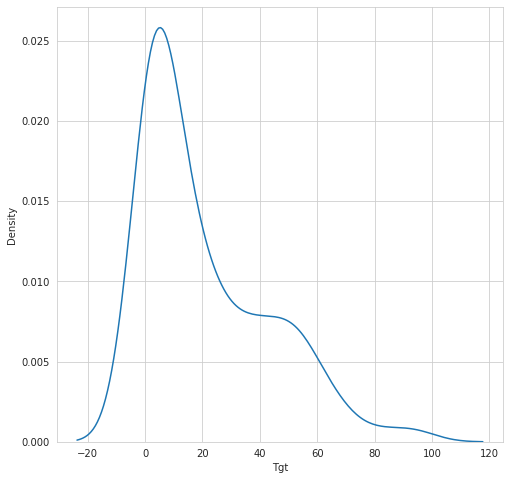

In [47]:
plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['Tgt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


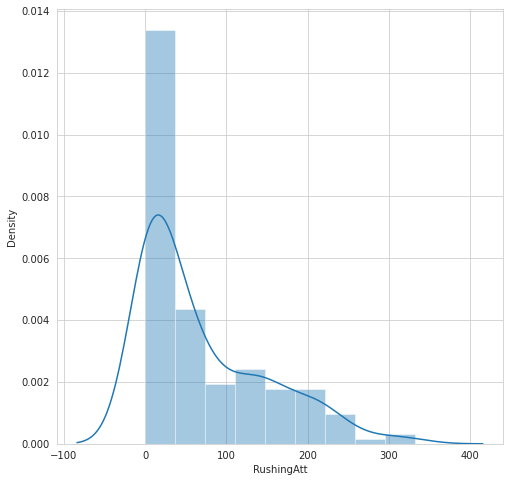

In [48]:
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['RushingAtt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


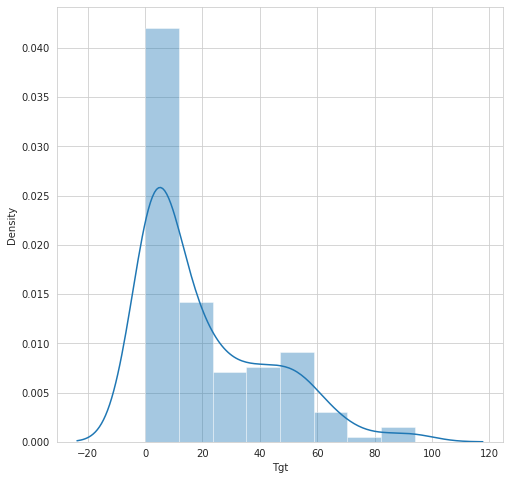

In [49]:
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['Tgt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


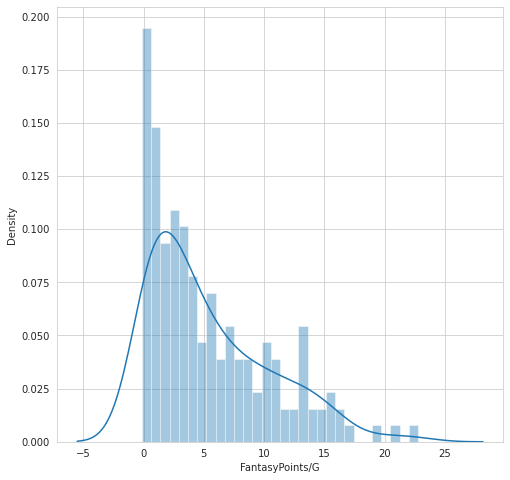

In [50]:
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['FantasyPoints/G'], bins=30)

It can be seen that the distributions are more skewed to the left. This means that the majority of RBs have low carries and low fantasy points output. There are only a few players who are responsible for most of the fantasy output.

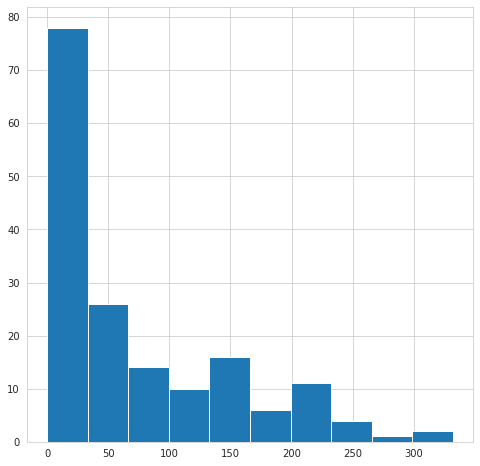

In [51]:
plt.figure(figsize=(8, 8))
plt.hist(rb_df['RushingAtt']);

In [52]:
# just some random RBs
rb_df[80:90]

,Player,Tm,G,RushingAtt,Tgt,Rec,ReceivingYds,ReceivingTD,FumblesLost,RushingYds,RushingTD,PassingYds,PassingTD,Int,Usage/G,FantasyPoints/G
281,Giovani Bernard,TAM,12,8.0,29.0,23.0,123.0,3.0,0.0,58.0,0.0,0.0,0.0,0.0,3.083333,3.966667
282,Matt Breida,BUF,9,26.0,9.0,7.0,72.0,2.0,1.0,125.0,1.0,0.0,0.0,0.0,3.888889,4.355556
288,Chris Evans,CIN,14,17.0,17.0,15.0,151.0,2.0,0.0,77.0,0.0,0.0,0.0,0.0,2.428571,3.021429
295,Carlos Hyde,JAX,12,72.0,21.0,12.0,65.0,0.0,2.0,253.0,1.0,0.0,0.0,0.0,7.750000,3.316667
299,Le'Veon Bell,2TM,8,39.0,7.0,5.0,30.0,1.0,0.0,101.0,2.0,0.0,0.0,0.0,5.750000,4.200000
300,Demetric Felton,CLE,16,7.0,21.0,18.0,181.0,2.0,0.0,24.0,0.0,0.0,0.0,0.0,1.750000,2.593750
304,Ke'Shawn Vaughn,TAM,12,36.0,8.0,4.0,26.0,0.0,0.0,180.0,2.0,0.0,0.0,0.0,3.666667,2.883333
305,Ty'Son Williams,BAL,13,35.0,12.0,9.0,84.0,0.0,0.0,185.0,1.0,0.0,0.0,0.0,3.615385,2.876923
315,Craig Reynolds,DET,5,55.0,8.0,7.0,52.0,0.0,0.0,230.0,0.0,0.0,0.0,0.0,12.600000,6.340000
317,Salvon Ahmed,MIA,12,54.0,19.0,12.0,117.0,0.0,0.0,149.0,0.0,0.0,0.0,0.0,6.083333,2.716667


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


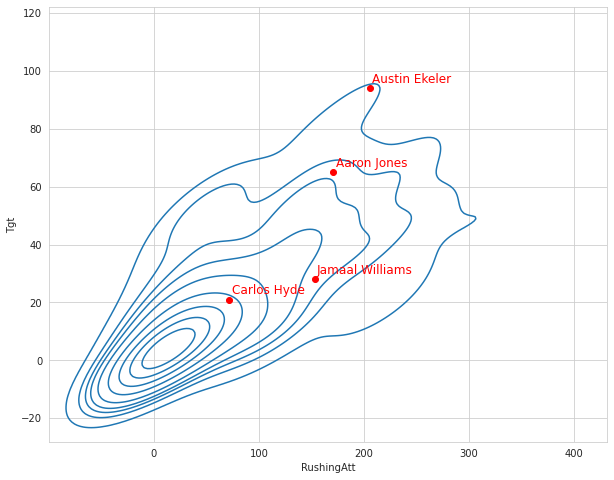

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))

notable_players = [
    'Austin Ekeler', 'Aaron Jones', 'Jamaal Williams', 'Carlos Hyde'
]

for player_name in notable_players:
    
    player = rb_df.loc[rb_df['Player'] == player_name]
    
    # if the df I get back is not empty, run the code below
    if not player.empty:
        # grab targets and rushing attempts
        targets = player['Tgt']
        rushes = player['RushingAtt']
        
        ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
        ax.scatter(rushes, targets, color='red')

sns.kdeplot(rb_df['RushingAtt'], rb_df['Tgt'], ax=ax);

Residual Plots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


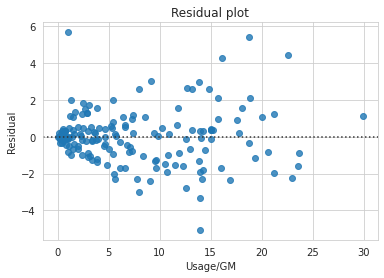

In [54]:
sns.residplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])

plt.title('Residual plot')
plt.xlabel('Usage/GM') 
plt.ylabel('Residual') 
plt.show()

 As can be seen, the distribution along the y-axis is relatively equally distributed, but as I go along the x-axis, it does widen. This indicates that further out in the players with heavy Usage, there is something else that THE model is missing that can predict Fantasy Football performance. For those players with a low amount of Usage, our model can accurately forecast their performance.

Pair Plots

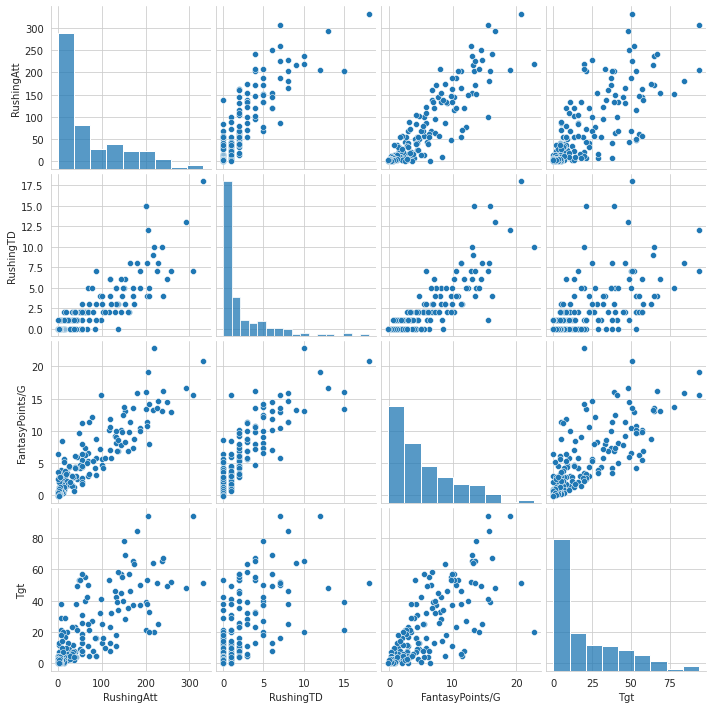

In [55]:
rb_df_copy = rb_df[[
    'RushingAtt', 'RushingTD', "FantasyPoints/G", 'Tgt'
]]

sns.pairplot(rb_df_copy)

Comparison of weekly player stats

In [56]:
final_df = pd.DataFrame()

WEEKLY_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202021/{week_num}.csv'

for week in range(1, 19):
    df = pd.read_csv(WEEKLY_BASE_URL.format(week_num=week)).iloc[:, 1:] # index_col=0 not necessary here. Data is properly formatted with Unnamed: 0 column
    df['Week'] = week
    final_df = pd.concat([final_df, df])
    
print(final_df.shape)
final_df.head()

(7200, 20)


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints,Week
0,Amari Cooper,WR,DAL,0,0,0,0,0,0,0,0,13,17,139,2,0,25.90,38.90,32.40,1
1,Tyreek Hill,WR,KAN,0,0,0,0,0,1,4,0,11,15,197,1,0,26.10,37.10,31.60,1
2,Patrick Mahomes,QB,KAN,337,3,0,36,27,5,18,1,0,0,0,0,0,33.28,33.28,33.28,1
3,Deebo Samuel,WR,SFO,0,0,0,0,0,0,0,0,9,12,189,1,1,22.90,31.90,27.40,1
4,Kyler Murray,QB,ARI,289,4,1,32,21,5,20,1,0,0,0,0,0,33.56,33.56,33.56,1


In [57]:
lamar = final_df.loc[final_df['Player'] == 'Lamar Jackson']
mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
wilson = final_df.loc[final_df['Player'] == 'Russell Wilson']

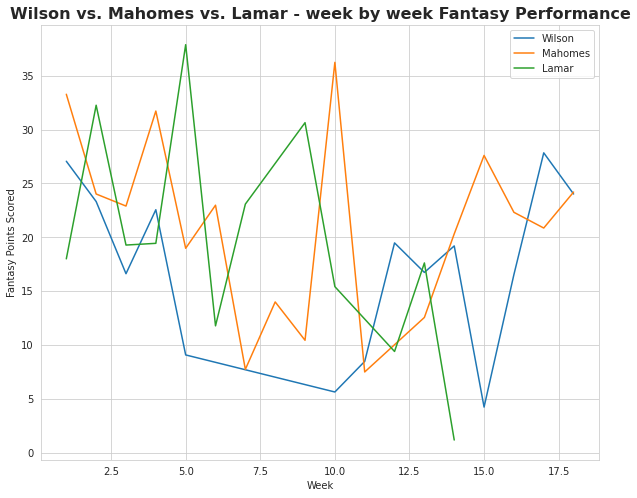

In [58]:
sns.set_style('whitegrid') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
plt.plot(wilson['Week'], wilson['StandardFantasyPoints']) # first argument is x, second is y
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'])
plt.plot(lamar['Week'], lamar['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Lamar']) # setting legend in order of how we plotted things
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Lamar - week by week Fantasy Performance', fontsize=16, fontweight='bold') # adjusting font size to 16px
plt.show() # show our visualization, not completely necessary, but supresses unneccessary output from matplotlib

In [60]:
import numpy as np
plt.figure(figsize=(15, 10))
lamar = lamar.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1) # dropping non-relevant fantasy stats
sns.heatmap(lamar.corr()[['StandardFantasyPoints']], annot=True);

KeyError: ignored

<Figure size 1080x720 with 0 Axes>

Lmplots

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv').iloc[:, 1:]
df = df[df['G']>0]

df_copy = df.copy(deep=True)

fantasy_scoring_weights = {
    'Rec': 0.5, # Half-PPR
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'FumblesLost': -2, #fumbles lost
    'RushingYds': 0.1,
    'RushingTD': 6,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -1
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

df_copy.loc[:, 'Usage/Gm'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df_copy.loc[:, 'FantasyPoints/Gm'] = df.apply(get_fantasy_points, axis=1)

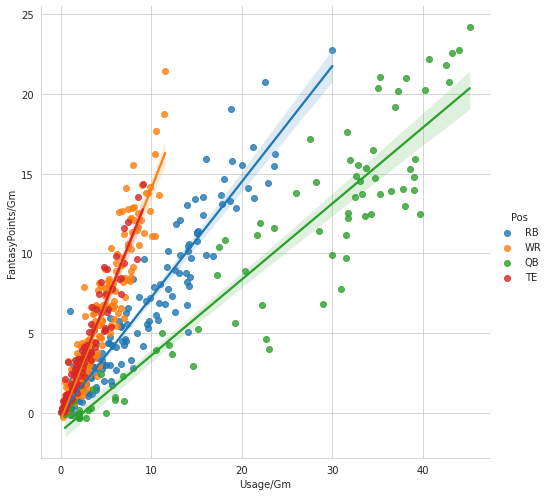

In [65]:
sns.lmplot(data=df_copy, x='Usage/Gm', y='FantasyPoints/Gm', hue='Pos', height=7);

# Are Tight Ends actually Touchdown-dependent?

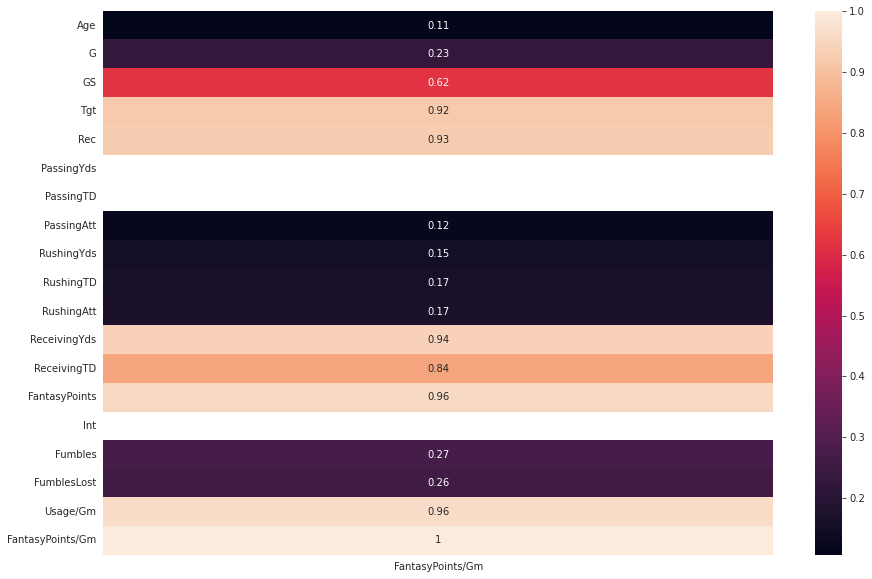

In [66]:
corr = df_copy.loc[df_copy['Pos'] == 'TE'].corr()[['FantasyPoints/Gm']]
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True);

According to the result above it seems like there is actually not that big of a correlation to the TDs than to the Targets and Receptions!

# Working with Combine Data

In [68]:
COMBINE_URL = "https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202020.csv"

combine_df = pd.read_csv(COMBINE_URL).iloc[:, 2:] # this is subject to change as I clean the data
combine_df.head()

,Rk,Year,Player,Pos,Age,AV,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,1,2000,Bashir Yamini,WR,22.0,0,Iowa,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN
1,2,2000,James Williams,WR,22.0,4,Marshall,5-11,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks / 6th / 175th pick / 2000
2,3,2000,Dez White,WR,20.0,19,Georgia Tech,6-1,218,4.62,37.5,NaN,124.0,6.91,4.09,Chicago Bears / 3rd / 69th pick / 2000
3,4,2000,Peter Warrick,WR,22.0,30,Florida State,5-11,194,4.58,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals / 1st / 4th pick / 2000
4,5,2000,Troy Walters,WR,23.0,13,Stanford,5-6,171,4.55,32.5,NaN,106.0,6.61,3.84,Minnesota Vikings / 5th / 165th pick / 2000


In [69]:
combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,209.0,4.813445,0.176743,4.33,4.71,4.82,4.91,5.37
RB,414.0,4.536739,0.102188,4.24,4.46,4.54,4.60,4.84
TE,268.0,4.755784,0.137573,4.37,4.66,4.77,4.84,5.06
WR,612.0,4.493513,0.097411,4.22,4.42,4.50,4.56,4.79


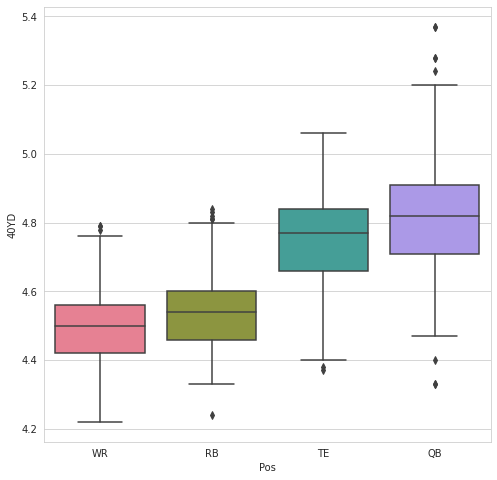

In [71]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Pos', y='40YD', data=combine_df, palette=sns.color_palette("husl", n_colors=4));